In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
from torchvision import transforms
from torch.autograd import Variable

In [3]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 24
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [4]:
#img = 
img = Image.open('../crappification/EM_train_hr_00009.tif').convert('LA')
#img.save(‘greyscale.png’)
T=transforms.Compose([transforms.ToTensor()])
P=transforms.Compose([transforms.ToPILImage()])

In [5]:
ten=torch.unbind(T(img))
x=ten[0].unsqueeze(0).unsqueeze(0)

In [6]:
x.shape

torch.Size([1, 1, 600, 900])

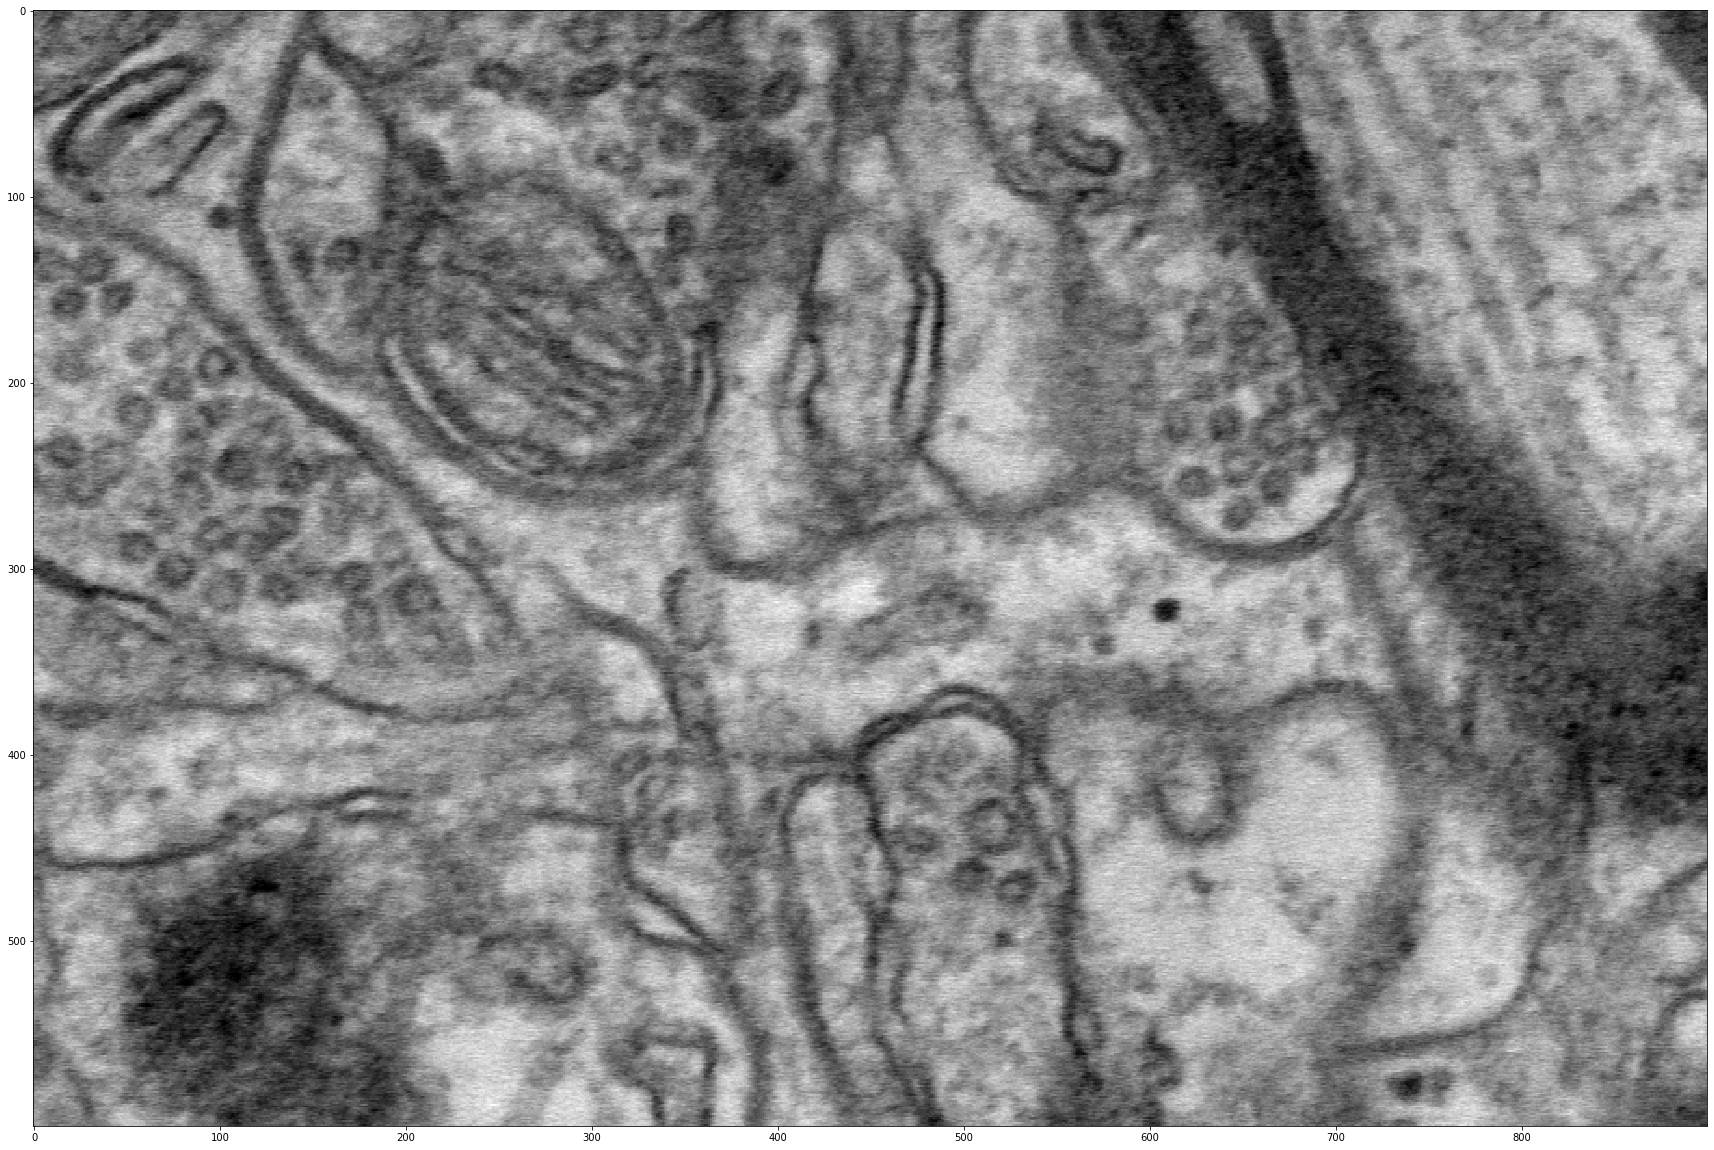

In [7]:
plt.imshow(np.squeeze(x), cmap=plt.cm.gray)

In [19]:
# Black and white input image x, 1x1xHxW
# Create Localized horizontal gradient convolution kernel (Sobel)
h = torch.Tensor([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
# Expand dims to account for (batch_size, num_channels, height, width)
h = h.expand(3, -1, -1).view((1,3,3,3))
# Apply conv layer using kernel
G_x = F.conv2d(x, h, padding=1, stride=1, bias=None)
G_y = F.conv2d(x, h.T.view((1,3,3,3)), padding=1, stride=1, bias=None)

G = torch.sqrt(torch.pow(G_x, 2) + torch.pow(G_y, 2))

RuntimeError: Given groups=1, weight of size 1 3 3 3, expected input[1, 1, 600, 900] to have 3 channels, but got 1 channels instead

In [16]:
h = torch.Tensor([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
h.expand(3, -1,-1).view(1,3,3,3)

tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]],

         [[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]],

         [[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]]]])

In [33]:
G.squeeze().shape

torch.Size([600, 900])

In [34]:
res = P(G.squeeze())

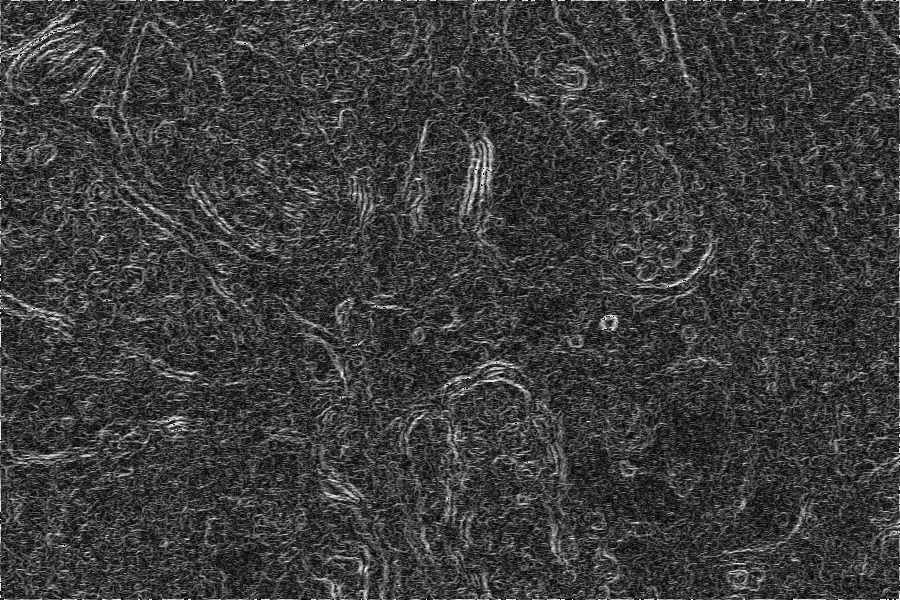

In [35]:
res

In [ ]:
F.mse_loss()

In [ ]:
def img_grad(x, num_channels=3):
    # Create Localized horizontal gradient convolution kernel (Sobel)
    h = torch.Tensor([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]])
    # Expand dims to account for (batch_size, num_channels, height, width)
    h = h.view((1,1,3,3))
    # Apply conv layers using Sobel kernel
    G_x = F.conv2d(x, h, padding=1, stride=1, bias=None)
    G_y = F.conv2d(x, h.T.view((1,1,3,3)), padding=1, stride=1, bias=None)
    # Compute image gradient using Finite Difference Approximation
    G = torch.sqrt(torch.pow(G_x, 2) + torch.pow(G_y, 2))
    return G

In [53]:
def sharp_loss(output, target, alpha=0.001):
    # Compute MSE term using output and target images
    mse_term = F.mse_loss(output, target)
    # compute sharpness term using L2 norm of output image gradient
    sharp_term = torch.norm(img_grad(output), p=2)
    # compute overall Sharp Loss
    return mse_term + (alpha*sharp_term)

In [39]:
ans = G.view(1, -1)
ans = torch.norm(ans, p=2, dim=1)
torch.sum(ans)

tensor(219.9475)

In [40]:
torch.sum(G**2)

tensor(48378.5430)

In [46]:
torch.norm(G, p=2)

tensor(219.9475)

In [49]:
torch.sum(G)

tensor(131021.5312)

In [52]:
torch.sum(G)

tensor(131021.5312)

In [16]:
h

tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]]]])

In [24]:
h_t = h.T.view(1,1,3,3)
h_t

tensor([[[[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]]]])

In [ ]:
b = torch.Tensor([[1, 2, 1],
[0, 0, 0],
[-1, -2, -1]])

b = b.view((1,1,3,3))
G_y = F.conv2d(x, b)

G = torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
res = P(G)

In [23]:
b = torch.Tensor([[1, 2, 1],
[0, 0, 0],
[-1, -2, -1]])

b = b.view((1,1,3,3))
b

tensor([[[[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]]]])